In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state = 42)

In [8]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
print(data.DESCR)

In [10]:
data.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [11]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1.0)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.43840029731424457

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1.0)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.3791413953419158

In [14]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
elastic.fit(X_train, y_train)
elastic.score(X_test, y_test)

-0.004438393929198314

In [16]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

linear = LinearRegression()
linear.fit(X_train, y_train)

coefs = np.vstack((linear.coef_, ridge.coef_, lasso.coef_, elastic.coef_))
index = ['linear', 'ridge', 'lasso', 'elastic']

coefs_df = pd.DataFrame(coefs, columns = data.feature_names, index = index)
print("정규화 선형회귀 모델별 가중치(계수) 비교")

coefs_df

정규화 선형회귀 모델별 가중치(계수) 비교


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
linear,47.749681,-241.990907,531.971063,381.562862,-918.502905,508.257783,116.950164,269.492303,695.808117,26.324582
ridge,50.552012,-67.722224,278.301228,197.622638,-6.245836,-26.226726,-151.394331,120.323359,215.854463,101.755774
lasso,0.000000,-0.000000,398.385831,46.175421,0.000000,0.000000,-0.000000,0.000000,238.187309,0.000000
elastic,0.413088,0.000000,3.298991,2.256916,0.339380,0.080784,-1.874661,2.143869,2.947963,1.701981


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [19]:
bostonDF = pd.read_csv("boston_house.csv")
print("Boston 데이터셋 크기 : ", bostonDF.shape)
bostonDF.head(2)

Boston 데이터셋 크기 :  (506, 14)


,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.9,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.9,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6


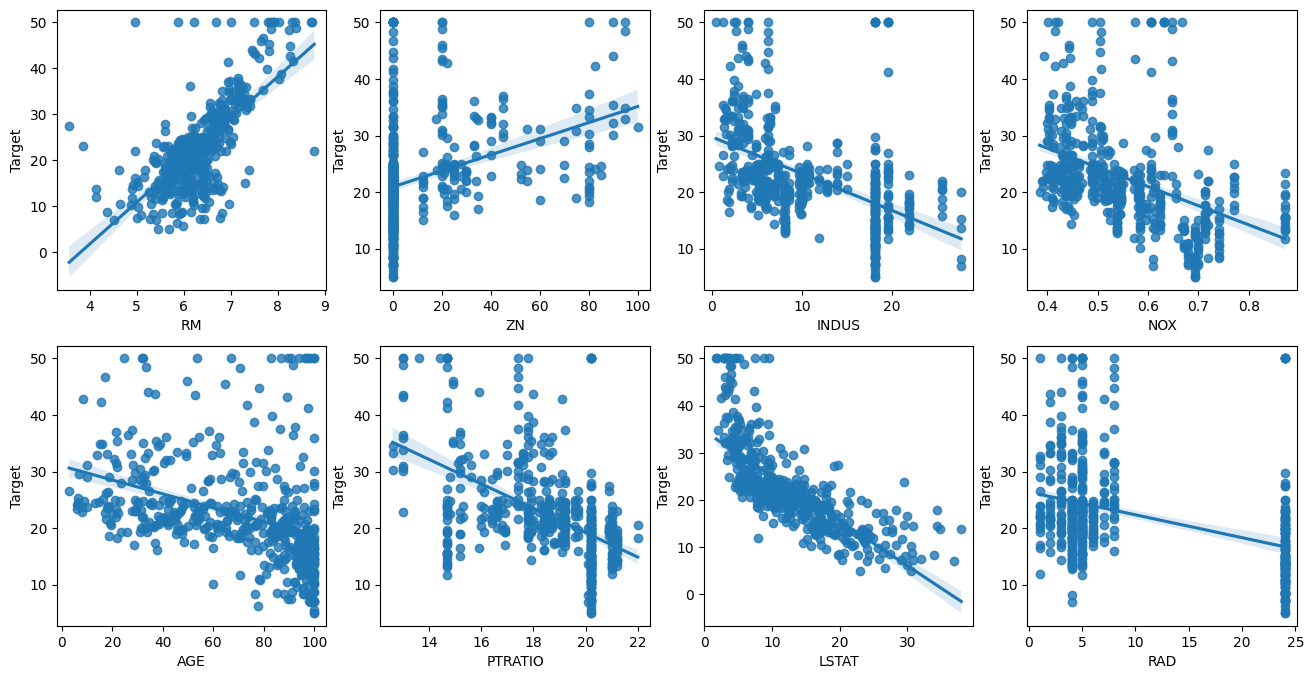

In [21]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'Target', data = bostonDF, ax = axs[row][col])

In [22]:
bostonDF.corr()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
AGE,1.000000,-0.273534,-0.240265,0.352734,-0.747881,0.644779,0.602339,0.731470,0.261515,0.456022,-0.569537,0.506456,0.086518,-0.376955
B,-0.273534,1.000000,0.128069,-0.385064,0.291512,-0.356977,-0.366087,-0.380051,-0.177383,-0.444413,0.175520,-0.441808,0.048788,0.333461
RM,-0.240265,0.128069,1.000000,-0.219247,0.205246,-0.391676,-0.613808,-0.302188,-0.355501,-0.209847,0.311991,-0.292048,0.091251,0.695360
CRIM,0.352734,-0.385064,-0.219247,1.000000,-0.379670,0.406583,0.455621,0.420972,0.289946,0.625505,-0.200469,0.582764,-0.055892,-0.388305
DIS,-0.747881,0.291512,0.205246,-0.379670,1.000000,-0.708027,-0.496996,-0.769230,-0.232471,-0.494588,0.664408,-0.534432,-0.099176,0.249929
INDUS,0.644779,-0.356977,-0.391676,0.406583,-0.708027,1.000000,0.603800,0.763651,0.383248,0.595129,-0.533828,0.720760,0.062938,-0.483725
LSTAT,0.602339,-0.366087,-0.613808,0.455621,-0.496996,0.603800,1.000000,0.590879,0.374044,0.488676,-0.412995,0.543993,-0.053929,-0.737663
NOX,0.731470,-0.380051,-0.302188,0.420972,-0.769230,0.763651,0.590879,1.000000,0.188933,0.611441,-0.516604,0.668023,0.091203,-0.427321
PTRATIO,0.261515,-0.177383,-0.355501,0.289946,-0.232471,0.383248,0.374044,0.188933,1.000000,0.464741,-0.391679,0.460853,-0.121515,-0.507787
RAD,0.456022,-0.444413,-0.209847,0.625505,-0.494588,0.595129,0.488676,0.611441,0.464741,1.000000,-0.311948,0.910228,-0.007368,-0.381626


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
y_target = bostonDF['Target']
X_data = bostonDF.drop(['Target'], axis = 1, inplace = False)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [32]:
print('절편 값:', lr.intercept_)
print('회귀계수 값 : ', np.round(lr.coef_, 1))

절편 값: 40.995595172164926
회귀계수 값 :  [  0.    0.    3.4  -0.1  -1.7   0.   -0.6 -19.8  -0.9   0.4   0.1  -0.
   3. ]


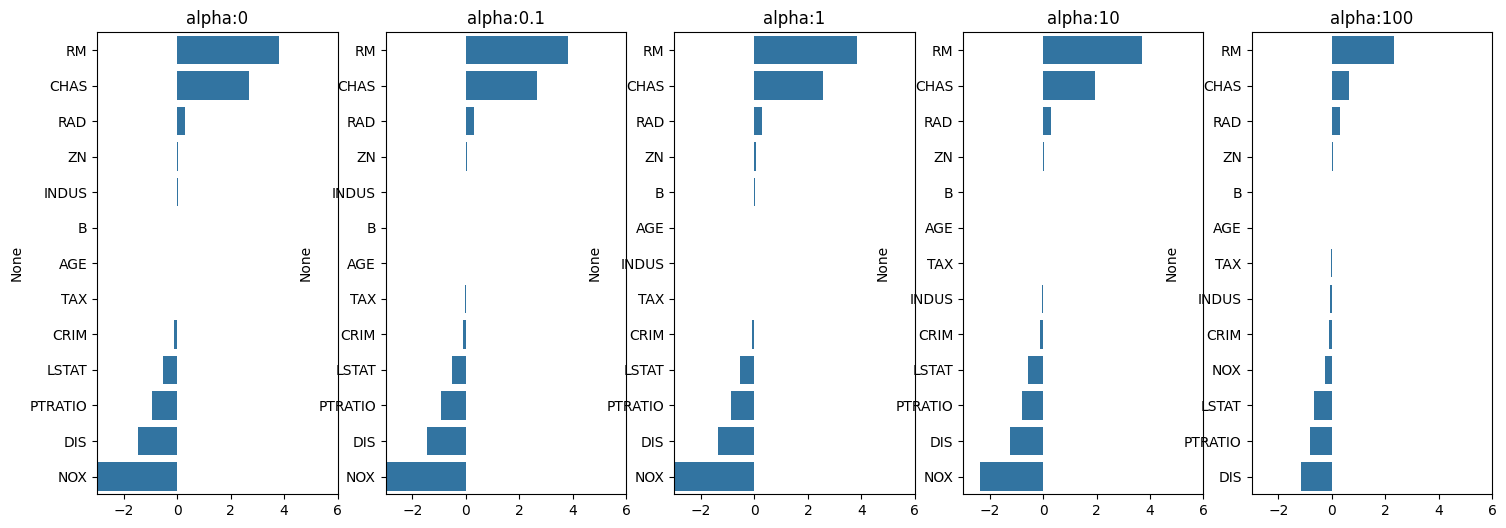

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()

alphas = [0, 0.1, 1, 10, 100]

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])

plt.show()

In [34]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [35]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score

def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True):
    coeff_df = pd.DataFrame()
    if verbose : 
        print("#######", model_name, "#######")
    for param in params:
        if model_name == "Ridge":
            model = Ridge(alpha = param)
        elif model_name == "Lasso":
            model = Lasso(alpha = param)
        elif model_name == "ElasticNet":
            model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = "neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print("alpha {0}일 때 5폴드 세트의 평균 RMSE : {1:.3f} ".format(param, avg_rmse))
        model.fit(X_data, y_target)
        coeff = pd.Series(data = model.coef_, index = X_data.columns)
        colname = "alpha:" + str(param)
        coeff_df[colname] = coeff

    return coeff_df

In [36]:
lasso_alphas = [0.05, 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval("Lasso", params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

####### Lasso #######
alpha 0.05일 때 5폴드 세트의 평균 RMSE : 5.628 
alpha 0.07일 때 5폴드 세트의 평균 RMSE : 5.612 
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.615 
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 5.669 
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.776 
alpha 3일 때 5폴드 세트의 평균 RMSE : 6.189 


In [37]:
sort_column = "alpha:" + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending = False)

,alpha:0.05,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.837040,3.789730,3.703192,2.498176,0.949782,0.000000
CHAS,1.761614,1.434346,0.955172,0.000000,0.000000,0.000000
RAD,0.271029,0.270932,0.274717,0.277443,0.264221,0.061898
ZN,0.048832,0.049065,0.049218,0.049556,0.049180,0.037248
B,0.010194,0.010248,0.010249,0.009468,0.008247,0.006510
AGE,-0.011875,-0.011708,-0.010039,0.003601,0.020909,0.042504
TAX,-0.014030,-0.014290,-0.014571,-0.015442,-0.015213,-0.008604
INDUS,-0.041321,-0.042124,-0.036620,-0.005258,-0.000000,-0.000000
CRIM,-0.098938,-0.098196,-0.097900,-0.083293,-0.063444,-0.000000
LSTAT,-0.553878,-0.560427,-0.568765,-0.656287,-0.761110,-0.807680


In [38]:
elastic_alphas = [0.05, 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval("ElasticNet", params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)
sort_column = "alpha:" + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by = sort_column, ascending = False)

####### ElasticNet #######
alpha 0.05일 때 5폴드 세트의 평균 RMSE : 5.555 
alpha 0.07일 때 5폴드 세트의 평균 RMSE : 5.542 
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.526 
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 5.467 
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.597 
alpha 3일 때 5폴드 세트의 평균 RMSE : 6.068 


,alpha:0.05,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.679130,3.574171,3.414153,1.918399,0.938889,0.000000
CHAS,1.615715,1.330718,0.979702,0.000000,0.000000,0.000000
RAD,0.277085,0.278882,0.283443,0.300767,0.289276,0.146873
ZN,0.049635,0.050112,0.050623,0.052890,0.052149,0.038285
B,0.010117,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010752,-0.010117,-0.008279,0.007758,0.020342,0.043440
TAX,-0.014245,-0.014522,-0.014814,-0.016047,-0.016218,-0.011419
INDUS,-0.043437,-0.044855,-0.042720,-0.023247,-0.000000,-0.000000
CRIM,-0.099914,-0.099472,-0.099217,-0.089076,-0.073582,-0.019069
LSTAT,-0.564984,-0.574819,-0.587698,-0.693858,-0.760434,-0.800342
